# Regression Project

The main goal of the project: pick a regression model and find the best
RMSE given train data (X and y) and given the X of the test data. The y of the test data is not given. 

In [67]:
# Imports:
import pandas as pd
import numpy as np
from scipy import stats # for Z scores
import seaborn as sns # Correlation matrix
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import OneHotEncoder, StandardScaler # for one-hot encoding in regression and data normalization
from sklearn.metrics import mean_squared_error
import json

# import pydot
# from IPython.display import Image
# from six import StringIO
# from sklearn.tree import export_graphviz

In [68]:
X_train = pd.read_csv("X.csv")
X_train.head(4)

Unnamed: 0.1  Unnamed: 0   Age Gender  Education Level          Job Title  \
0          2477        2477  52.0      M  bachelor's|degr  back|end|develope   
1            76          76  52.0      F         bachelor  operations|manage   
2            64          64  27.0      M         bachelor   junior|accountan   
3           924         924  32.0      M         bachelor        data|analys   

   Years of Experience   Country        Race    height     weight    id  \
0                 24.0  australi       Asian  1.800316  95.021957  2477   
1                 23.0        us       White  2.451414  87.456039    76   
2                  2.0  australi  Australian  1.917509  56.997108    64   
3                 11.0         u       Welsh  2.160562  61.403169   924   

   professionalism  
0           1150.0  
1           1100.0  
2             26.0  
3            279.0

In [69]:
X_train.shape

(5363, 13)

Check if the columns are duplicates

In [70]:
X_train.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Age', 'Gender', 'Education Level',
       'Job Title', 'Years of Experience', 'Country', 'Race', 'height',
       'weight', 'id', 'professionalism'],
      dtype='object')

In [71]:
# Check if 'Unnamed: 0', 'Unnamed: 0.1' and 'id' are duplicates
are_columns_duplicates_1_2 = (X_train['Unnamed: 0'] == X_train['Unnamed: 0.1']).all()
are_columns_duplicates_1_id = (X_train['Unnamed: 0'] == X_train['id']).all()
are_columns_duplicates_2_id = (X_train['Unnamed: 0.1'] == X_train['id']).all()

# Drop 'Unnamed: 0' and 'Unnamed: 0.1' if they are duplicates of 'id'
if are_columns_duplicates_1_2 and are_columns_duplicates_1_id and are_columns_duplicates_2_id:
    X_train.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

In [72]:
X_train.head(4)

Age Gender  Education Level          Job Title  Years of Experience  \
0  52.0      M  bachelor's|degr  back|end|develope                 24.0   
1  52.0      F         bachelor  operations|manage                 23.0   
2  27.0      M         bachelor   junior|accountan                  2.0   
3  32.0      M         bachelor        data|analys                 11.0   

    Country        Race    height     weight    id  professionalism  
0  australi       Asian  1.800316  95.021957  2477           1150.0  
1        us       White  2.451414  87.456039    76           1100.0  
2  australi  Australian  1.917509  56.997108    64             26.0  
3         u       Welsh  2.160562  61.403169   924            279.0

In [73]:
X_train.shape  # changed from (5363, 13) to (5363, 11)

(5363, 11)

In [74]:
# Get the info of each column
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5363 entries, 0 to 5362
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5359 non-null   float64
 1   Gender               5359 non-null   object 
 2   Education Level      5360 non-null   object 
 3   Job Title            5361 non-null   object 
 4   Years of Experience  5360 non-null   float64
 5   Country              5363 non-null   object 
 6   Race                 5363 non-null   object 
 7   height               5363 non-null   float64
 8   weight               5361 non-null   float64
 9   id                   5363 non-null   int64  
 10  professionalism      5360 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 461.0+ KB


In [75]:
# Find rows where any cell has a null value
rows_with_null = X_train[X_train.isna().any(axis=1)]
print(len(rows_with_null))
rows_with_null

6


Age Gender  Education Level         Job Title  Years of Experience  \
417    NaN    NaN         bachelor  software|enginee                120.0   
467   28.0      M              NaN          develope                  9.0   
1309   NaN    NaN              NaN               NaN                  NaN   
2839   NaN    NaN           master       data|analys                120.0   
3071  28.0      F  bachelor's|degr           social|                  NaN   
4110   NaN    NaN              NaN               NaN                  NaN   

                Country             Race    height      weight    id  \
417   RazShmuelykingdom  NayaCollegegeek  2.492683  200.000000     0   
467                   u            White  2.481139   29.526878  2011   
1309                  u            White  2.497256         NaN   172   
2839  RazShmuelykingdom  NayaCollegegeek  2.480525  200.000000     1   
3071                 us            White  1.510105   50.294254  5247   
4110              canad            White  1.675847         NaN   260   

      professionalism  
417             160.0  
467             189.0  
1309              NaN  
2839             84.0  
3071              NaN  
4110              NaN

In [76]:
X_train.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Country', 'Race', 'height', 'weight', 'id', 'professionalism'],
      dtype='object')

In [77]:
# Consider dropping those rows
print(set(X_train['Gender']))
rows_with_O = X_train[X_train['Gender'] == 'O']
print(len(rows_with_O))

{'M', 'O', nan, 'F'}
12


In [78]:
# Remove all rows with any missing values (as they are only 6 rows out of 5363 rows):
X_train.dropna(inplace=True)

In [79]:
# X_train = X_train[X_train['Gender'] != 'O'] we can't remove them as they are included in the submission test

In [80]:
X_train.shape  # changed from (5363, 13) to (5343, 11)

(5357, 11)

In [81]:
y_train = pd.read_csv("y.csv")
y_train.head(4)
# print(y_train.shape)  # (5363, 2)

id    Salary
0  2477  175966.0
1    76  160000.0
2    64   35000.0
3   924  195000.0

In [82]:
y_train.info()  # we have all ids, but 5 of them have null Salary value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5363 entries, 0 to 5362
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      5363 non-null   int64  
 1   Salary  5358 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 83.9 KB


In [83]:
rows_with_null_y = y_train[y_train.isna().any(axis=1)]
print(rows_with_null_y)

        id  Salary
1138  3136     NaN
1309   172     NaN
3071  5247     NaN
4110   260     NaN
5077  6455     NaN


In [84]:
# Remove 5 rows with missing salary value:
y_train.dropna(inplace=True)

In [85]:
# Filter the data frames to only include 'id' values that are present in both:
common_ids = set(X_train['id']) & set(y_train['id'])

X_train = X_train[X_train['id'].isin(common_ids)]
y_train = y_train[y_train['id'].isin(common_ids)] 

print(X_train.shape, y_train.shape)

(5355, 11) (5355, 2)


In [86]:
# set(X_train['Gender'])
# set(X_train['Education Level'])
# set(X_train['Job Title'])
# set(X_train['Country'])
# set(X_train['Race']) 

In [87]:
# Columns of interest
object_columns = ['Gender', 'Education Level', 'Job Title', 'Country', 'Race']

# Loop through and print unique values
for column in object_columns:
    unique_values = set(X_train[column])
    print(f"Unique values in {column}:")
    print(", ".join([str(x) for x in unique_values]))
    print('-' * 50)

Unique values in Gender:
M, O, F
--------------------------------------------------
Unique values in Education Level:
high|scho, master's|degr, bachelor's|degr, p, master, bachelor
--------------------------------------------------
Unique values in Job Title:
senior|hr|generalis, senior|hr|manage, financial|adviso, director|of|operation, junior|ux|designe, junior|web|develope, marketing|analys, front|end|develope, junior|project|manage, software|manage, content|marketing|manage, it|manage, senior|graphic|designe, junior|develope, junior|sales|representativ, sales|executiv, graphic|designe, supply|chain|manage, digital|marketing|specialis, creative|directo, research|directo, senior|data|analys, senior|operations|manage, sales|manage, junior|social|media|specialis, vp|of|financ, customer|success|manage, copywrite, senior|sales|manage, junior|data|scientis, juniour|hr|generalis, junior|business|operations|analys, senior|marketing|specialis, juniour|hr|coordinato, technical|recruite, junio

More Data Processing

In [88]:
# Combine X_train and y_train based on 'id'
combined_df = pd.merge(X_train, y_train, on='id', how='inner')

In [89]:
combined_df.shape #(5343, 15)

(5355, 12)

In [90]:
# Remove outliers with Z-Score Method (defined by z-score greater than 3)

# Calculate the z-scores
z_scores = np.abs(stats.zscore(combined_df['Salary']))

# Define a threshold for identifying outliers 
threshold = 3

# Get boolean array where True indicates the presence of an outlier
outliers = (z_scores >= threshold)

# Count the number of outliers
num_outliers = np.sum(outliers)

# Filter out the outliers
filtered_entries = (z_scores < threshold)

# Create a DataFrame without outliers
combined_df = combined_df[filtered_entries]

# Print the number of outliers removed
print(f"Number of outliers removed: {num_outliers}")

Number of outliers removed: 0


Numerical Feature Selection with Correlation Matrix 

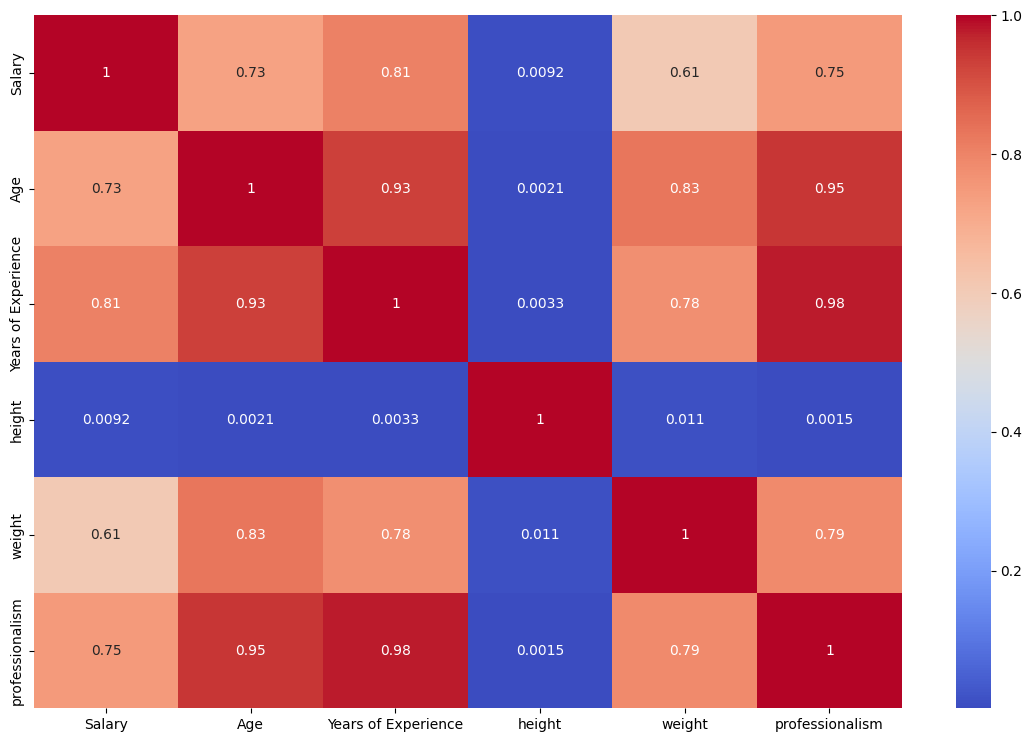

In [91]:
# Select numerical features of interest
selected_features = ['Salary', 'Age', 'Years of Experience', 'height', 'weight', 'professionalism']

# Create a correlation matrix
corr_matrix = combined_df[selected_features].corr()

# Plot the heatmap for visualization
plt.figure(figsize=(14, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


Interim conclusion:
1. The 'height' features seems uninformative given the low correlation with 'Salary'(0.0091)
2. 'Age', 'professionalism' and 'Years of Experience' are strongly correlated, possibly providing similar information (collinear variables?)
3. I'll drop 'height'. What about'Professionalism' ?

Handling categorical features before performing features selection
1. We will model only gender = 'F' or Gender ='M', as there are very few 'O' and we want to reduce complexity
2. There are too many job titles which could be grouped together by essential information (e.g.: 'Manager', 'Engineer')
3. Education Level could also be recoded to express rank

In [92]:
# Mapping
# I assume 'p' stands for something beyond masters given the mean salary and years of experience
# education_mapping = {
#     'high|scho': 'High School',
#     'p': 'PhD/Professional',
#     'bachelor': 'Bachelors',
#     "bachelor's|degr": 'Bachelors',
#     'master': 'Masters',
#     "master's|degr": 'Masters'
# }

# Update the label encoding
education_mapping = {
    'high|scho': 0,
    'p': 1,
    'bachelor': 2,
    "bachelor's|degr": 2,
    'master': 3,
    "master's|degr": 3
}

# Create a new education level column with cleaned-up labels
combined_df['New Education Level'] = combined_df['Education Level'].map(education_mapping)

In [93]:
## Unique values in Education Level: high|scho, p, bachelor's|degr, bachelor, master, master's|degr
# The values for mean salary and mean years of experience indicae that 'p' is probably above 'Masters'
grouped1 = combined_df.groupby('New Education Level')['Salary'].mean()
grouped2 = combined_df.groupby('New Education Level')['Years of Experience'].mean()
print('Mean Salary')
print(grouped1)
print('**********'*4)
print('Mean Years of Experience')
print(grouped2)

Mean Salary
New Education Level
0     37536.548961
1    165708.206865
2     95478.581654
3    129799.460570
Name: Salary, dtype: float64
****************************************
Mean Years of Experience
New Education Level
0     3.569733
1    15.361781
2     6.973468
3    11.134526
Name: Years of Experience, dtype: float64


In [94]:
# Mean salary for each job title
mean_salary_by_title = combined_df.groupby('Job Title')['Salary'].mean().reset_index()
mean_salary_by_title = mean_salary_by_title.sort_values('Salary')
mean_salary_by_title.head(3)

Job Title        Salary
102            receptionis  25000.000000
20          delivery|drive  28000.000000
75   junior|sales|associat  28296.296296

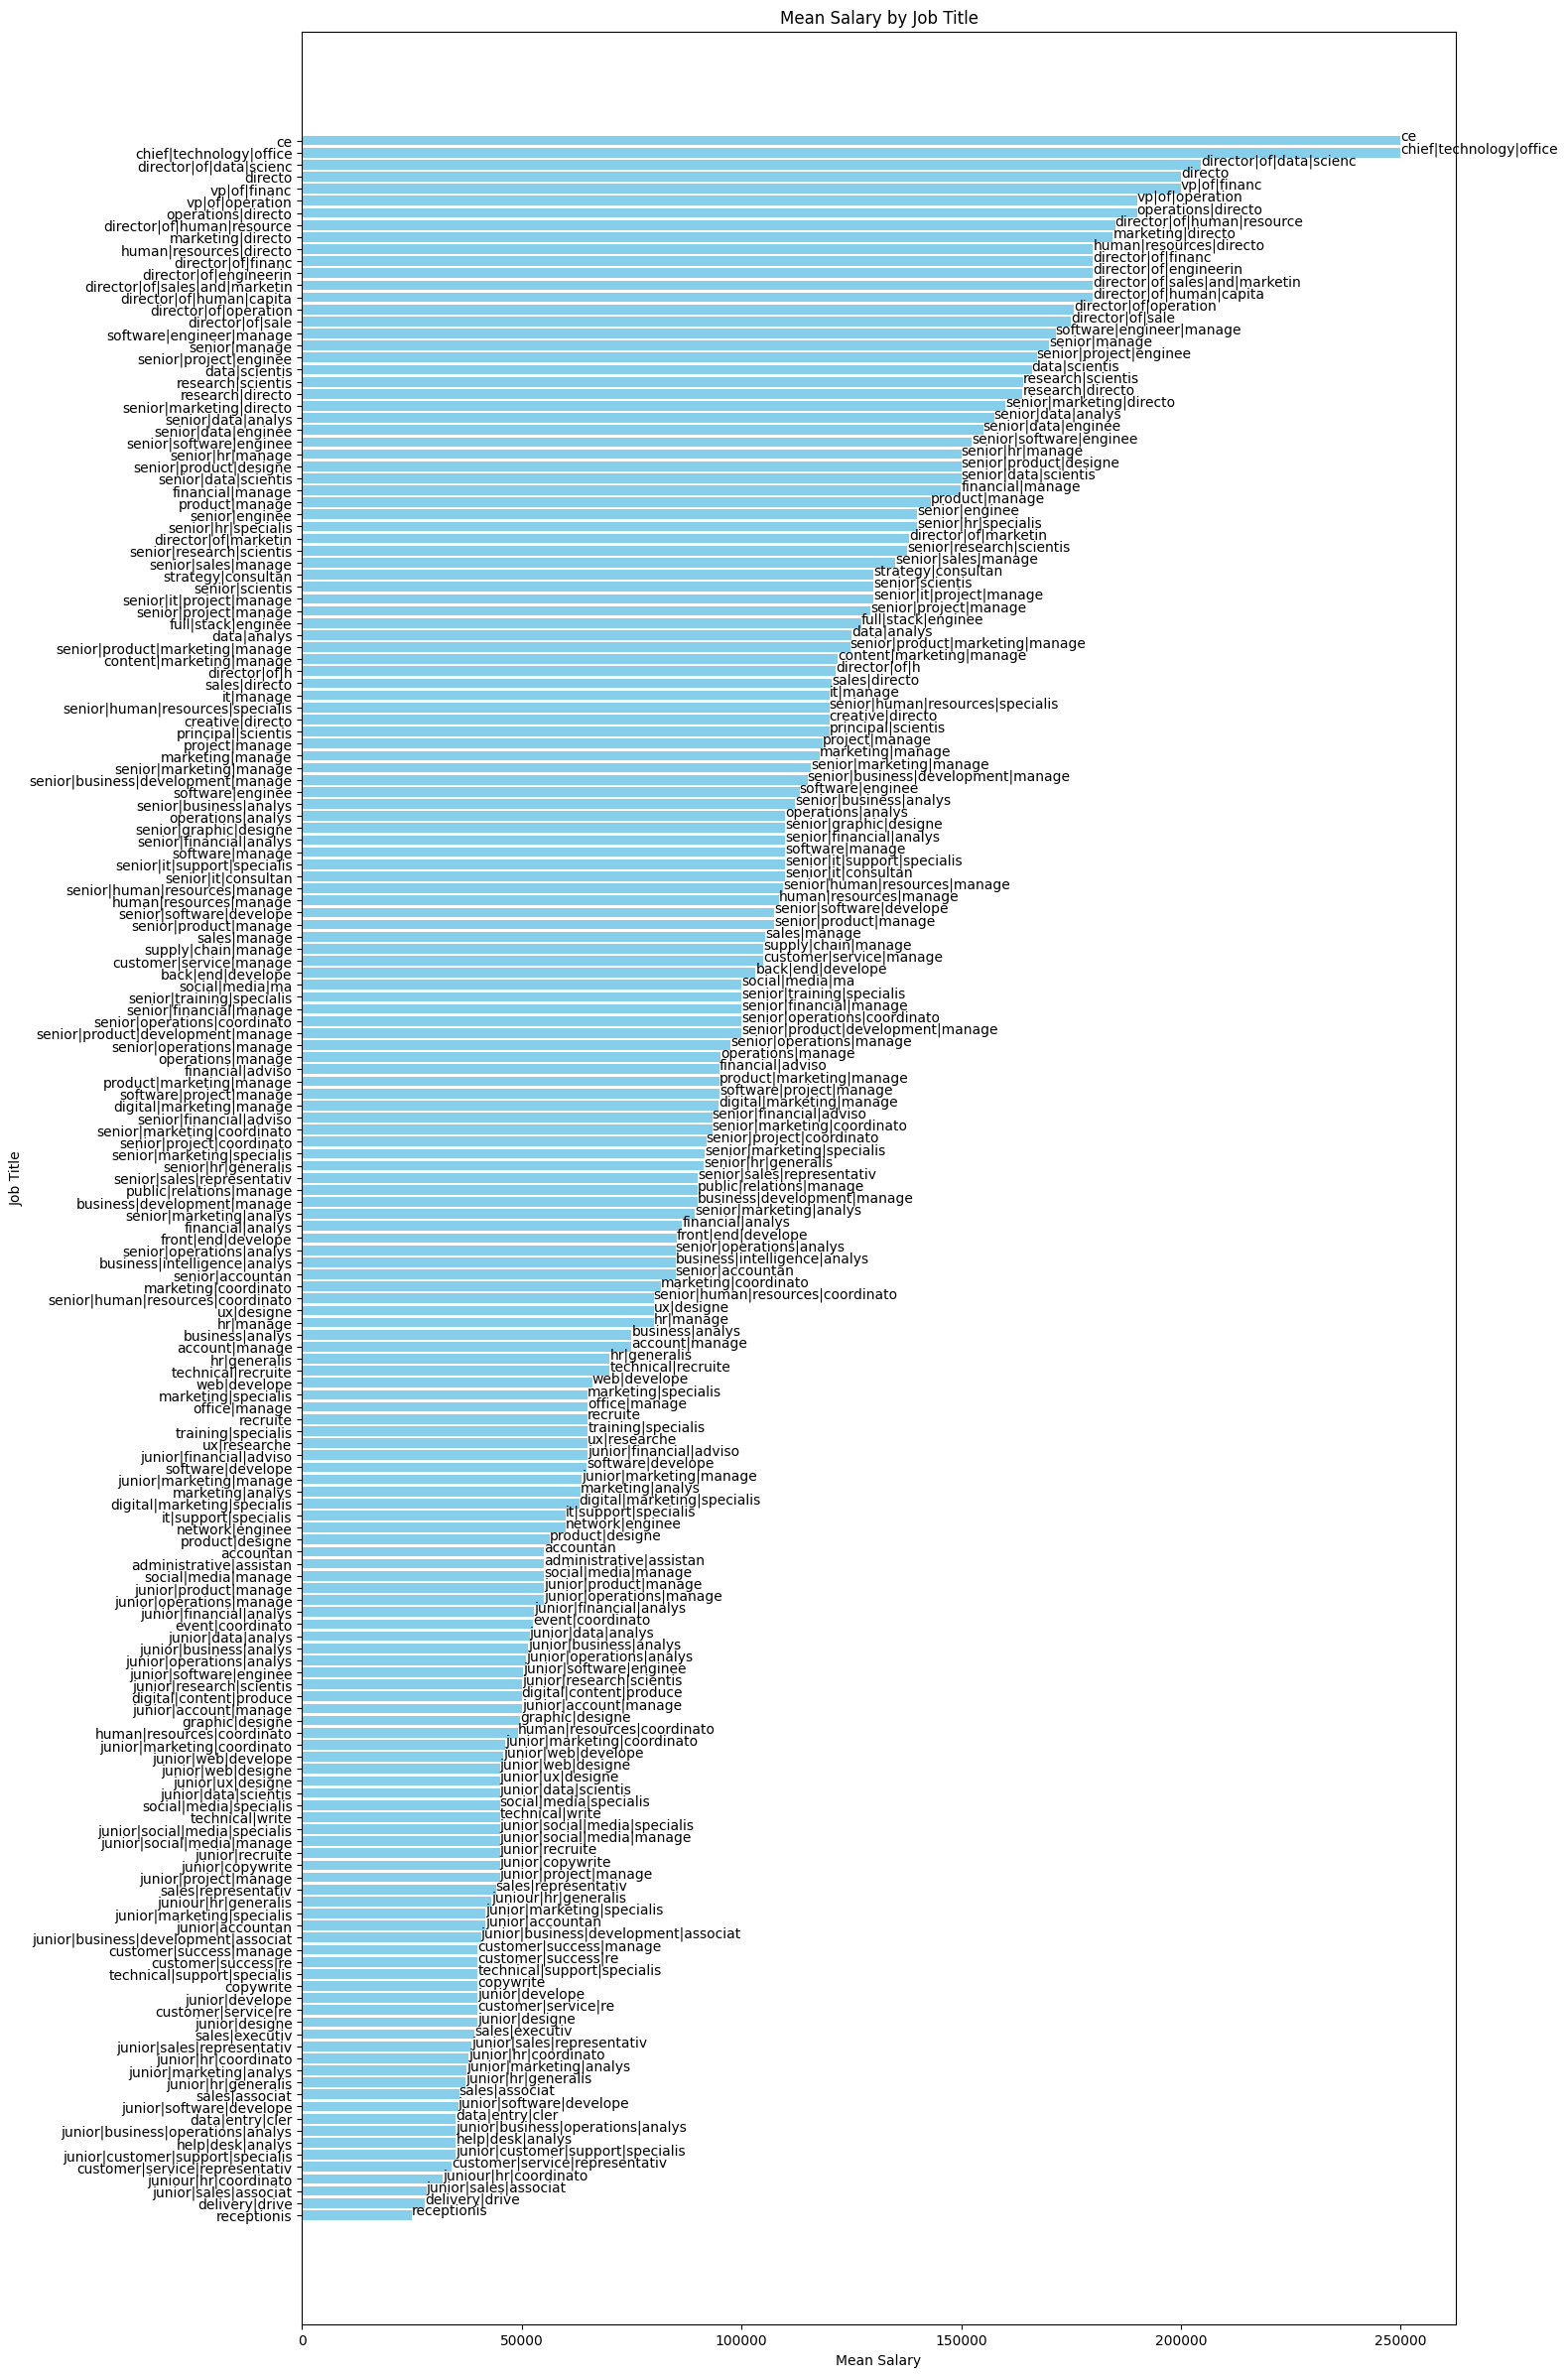

In [95]:
#Histogram of the mean salaries
plt.figure(figsize=(15, 30))  # set the figure size
plt.barh(mean_salary_by_title['Job Title'], mean_salary_by_title['Salary'], color='skyblue')

# Annotate each bar with the respective job title
for index, value in enumerate(mean_salary_by_title['Salary']):
    plt.text(value, index, str(mean_salary_by_title['Job Title'].iloc[index]))

plt.xlabel('Mean Salary')
plt.ylabel('Job Title')
plt.title('Mean Salary by Job Title')

plt.show()

# Looks like we can differentiate between director, senior, junior and other. The problem is that 'other' will include
# jobs with very high salary and vey low salary, so we might be losing data
# this is why  I think that we should use one-hot encoding and not label-encoding

In [96]:
# transforming the 'Job Title' based on salary quintiles to generate a more informative feature

# Step 1: Sort by Salary and divide into 6 quintiles
combined_df = combined_df.sort_values(by='Salary')
combined_df['Salary_Quintile'] = pd.qcut(combined_df['Salary'], 6, labels=[1, 2, 3, 4, 5, 6])

# Initialize an empty dictionary to hold word counts for each quintile
word_count_by_quintile = {}

# Step 2-5: Count word frequency per quintile
for quintile in [1, 2, 3, 4, 5, 6]:
    job_titles = combined_df[combined_df['Salary_Quintile'] == quintile]['Job Title']
    words = ' '.join(job_titles.str.replace('|', ' ')).split(' ')
    word_count = Counter(words)
    top_5_words = word_count.most_common(6)
    print(top_5_words)

# This shows some words appear across many quintiles, thus they are not good for separation: software, engineer, manager

[('junior', 388), ('sales', 256), ('associat', 169), ('develope', 162), ('software', 145), ('manage', 97)]
[('develope', 250), ('marketing', 226), ('software', 222), ('manage', 202), ('enginee', 178), ('end', 161)]
[('manage', 240), ('enginee', 195), ('senior', 185), ('marketing', 174), ('analys', 167), ('develope', 147)]
[('manage', 317), ('enginee', 181), ('data', 174), ('senior', 140), ('marketing', 136), ('scientis', 132)]
[('enginee', 304), ('software', 299), ('manage', 234), ('scientis', 226), ('senior', 225), ('data', 221)]
[('manage', 321), ('enginee', 242), ('software', 233), ('senior', 195), ('data', 186), ('engineer', 151)]


In [97]:
def group_job_titles(title):
    if 'sales' in title.lower():
        return 'Sales'
    elif 'marketing' in title.lower():
        return 'Marketing'
    elif 'data' in title.lower():
        return 'Data'
    elif 'coordinato' in title.lower():
        return 'Coordinator'
    elif 'scientis' in title.lower():
        return 'Scientist'
    elif 'full' in title.lower():
        return 'Full Stack'
    elif 'project' in title.lower():
        return 'Project Manager'
    else:
        return 'Other'

combined_df['Grouped Job Title'] = combined_df['Job Title'].apply(group_job_titles)

In [98]:
# # This filtering is optional:
# count_other = len(combined_df[combined_df['Grouped Job Title'] == 'Other'])
# print(f"The number of rows with 'Grouped Job Title' as 'Other': {count_other}")

# # Get rid of jobs that are difficult to classify
# combined_df = combined_df[combined_df['Grouped Job Title'] != 'Other']

In [99]:
combined_df.head(2)

Age Gender  Education Level             Job Title  Years of Experience  \
2385  33.0      F  bachelor's|degr  junior|hr|coordinato                  6.0   
2066  27.0      F  bachelor's|degr    front|end|develope                  2.0   

     Country   Race    height     weight    id  professionalism  Salary  \
2385      us  Asian  2.223738  53.455117  4633            124.0   500.0   
2066       u  Mixed  1.821968  45.229641  1890             25.0   550.0   

      New Education Level Salary_Quintile Grouped Job Title  
2385                    2               1       Coordinator  
2066                    2               1             Other

In [100]:
combined_df.groupby('Grouped Job Title')['Salary'].mean()

Grouped Job Title
Coordinator         50900.000000
Data               148856.000000
Full Stack         127233.722892
Marketing          102202.412869
Other              112196.877149
Project Manager    161527.810169
Sales               56804.034582
Scientist          151089.108911
Name: Salary, dtype: float64

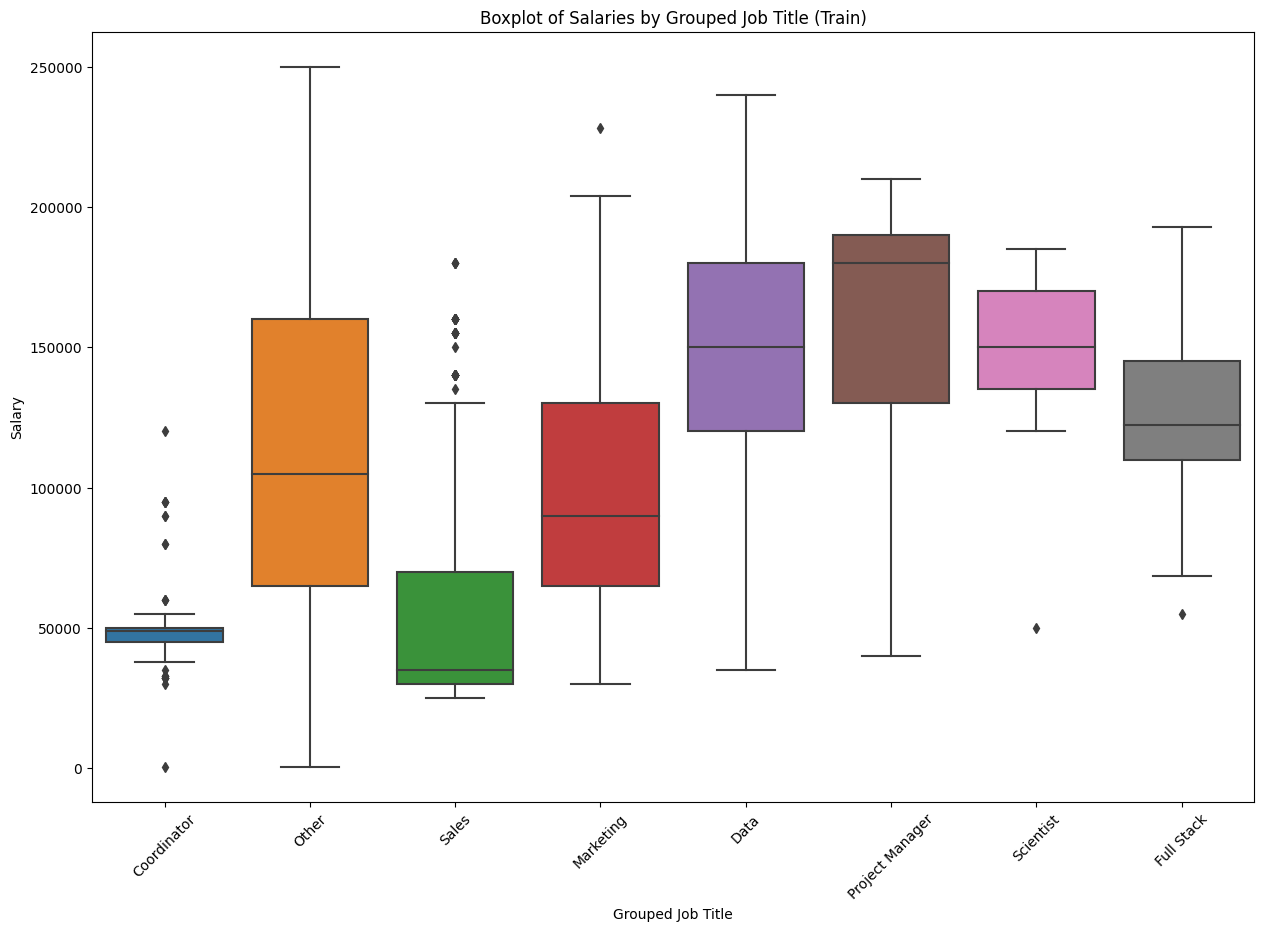

In [101]:
# Create a boxplot 
# As expected, the 'other' group is very variable and probably needs more grouping
plt.figure(figsize=(15, 10))
sns.boxplot(x='Grouped Job Title', y='Salary', data=combined_df)
plt.title("Boxplot of Salaries by Grouped Job Title (Train)")
plt.xticks(rotation=45)
plt.show()

Regression Tree Model

In [102]:
# Define features type (numerical or categorical)
numerical_cols = ['Age', 'Years of Experience','weight','professionalism', 'New Education Level']
categorical_cols = ['Gender', 'Grouped Job Title', 'Country', 'Race'] 

# One-hot encode the categorical data
encoder = OneHotEncoder(sparse_output=False)
encoded_categorical_data = encoder.fit_transform(combined_df[categorical_cols])

# Create a DataFrame from the encoded data, with correct column names
encoded_df = pd.DataFrame(encoded_categorical_data, columns=encoder.get_feature_names_out(categorical_cols))

# Combine with numerical data
final_df = pd.concat([encoded_df.reset_index(drop=True), combined_df[numerical_cols].reset_index(drop=True)], axis=1)

# Create Decision Tree model
# model = DecisionTreeRegressor(max_leaf_nodes=30)
model = DecisionTreeRegressor(max_depth=50, min_samples_split=25, min_samples_leaf=1)

# Fit model
model.fit(final_df, combined_df['Salary'])

# If you want to see feature importance
feature_importances = model.feature_importances_
feature_names = final_df.columns
sorted_idx = feature_importances.argsort()

# Sort features by importance and create a DataFrame
sorted_features = [(feature_names[i], feature_importances[i]) for i in sorted_idx]
sorted_features_df = pd.DataFrame(sorted(sorted_features, key=lambda x: x[1], reverse=True), columns=['Feature', 'Importance'])

# Show the DataFrame
print(sorted_features_df)

                              Feature  Importance
0                     professionalism    0.682712
1                 Years of Experience    0.144889
2              Grouped Job Title_Data    0.057643
3                                 Age    0.038874
4                 New Education Level    0.028800
5             Grouped Job Title_Other    0.011501
6                            Gender_M    0.006643
7   Grouped Job Title_Project Manager    0.005440
8        Grouped Job Title_Full Stack    0.005163
9                            Gender_F    0.004537
10        Grouped Job Title_Marketing    0.004453
11                             weight    0.003258
12                          Country_u    0.000732
13                      Race_Hispanic    0.000712
14      Grouped Job Title_Coordinator    0.000705
15            Grouped Job Title_Sales    0.000681
16                    Race_Australian    0.000672
17                         Race_Asian    0.000452
18                         Race_Black    0.000357


In [103]:
encoded_df

Gender_F  Gender_M  Gender_O  Grouped Job Title_Coordinator  \
0          1.0       0.0       0.0                            1.0   
1          1.0       0.0       0.0                            0.0   
2          0.0       1.0       0.0                            0.0   
3          1.0       0.0       0.0                            0.0   
4          1.0       0.0       0.0                            0.0   
...        ...       ...       ...                            ...   
5350       0.0       1.0       0.0                            0.0   
5351       0.0       1.0       0.0                            0.0   
5352       0.0       1.0       0.0                            0.0   
5353       0.0       1.0       0.0                            0.0   
5354       0.0       1.0       0.0                            0.0   

      Grouped Job Title_Data  Grouped Job Title_Full Stack  \
0                        0.0                           0.0   
1                        0.0                           0.0   
2                        0.0                           0.0   
3                        0.0                           0.0   
4                        0.0                           0.0   
...                      ...                           ...   
5350                     1.0                           0.0   
5351                     1.0                           0.0   
5352                     0.0                           0.0   
5353                     0.0                           0.0   
5354                     0.0                           0.0   

      Grouped Job Title_Marketing  Grouped Job Title_Other  \
0                             0.0                      0.0   
1                             0.0                      1.0   
2                             0.0                      1.0   
3                             0.0                      0.0   
4                             0.0                      0.0   
...                           ...                      ...   
5350                          0.0                      0.0   
5351                          0.0                      0.0   
5352                          0.0                      1.0   
5353                          0.0                      1.0   
5354                          0.0                      1.0   

      Grouped Job Title_Project Manager  Grouped Job Title_Sales  ...  \
0                                   0.0                      0.0  ...   
1                                   0.0                      0.0  ...   
2                                   0.0                      0.0  ...   
3                                   0.0                      1.0  ...   
4                                   0.0                      1.0  ...   
...                                 ...                      ...  ...   
5350                                0.0                      0.0  ...   
5351                                0.0                      0.0  ...   
5352                                0.0                      0.0  ...   
5353                                0.0                      0.0  ...   
5354                                0.0                      0.0  ...   

      Race_African American  Race_Asian  Race_Australian  Race_Black  \
0                       0.0         1.0              0.0         0.0   
1                       0.0         0.0              0.0         0.0   
2                       0.0         0.0              0.0         0.0   
3                       0.0         1.0              0.0         0.0   
4                       0.0         0.0              0.0         0.0   
...                     ...         ...              ...         ...   
5350                    0.0         0.0              0.0         1.0   
5351                    0.0         0.0              0.0         0.0   
5352                    0.0         0.0              0.0         1.0   
5353                    0.0         1.0              0.0         0.0   
5354              

In [104]:
# plt.figure(figsize=(50,40))  # Set the figure size
# plot_tree(model, 
#           feature_names=feature_names.tolist(),  # One-hot encoded feature names
#           filled=True, 
#           rounded=True, 
#           fontsize=16)
# plt.show()

Interim conclusions:
1. Country, Race and weight might be irrelevant/uninformative
2. Consider better grouping of the 'Job Title' feature
3. Repeat the model with fewer features without: Country, Race and weight (use the first tree model for further features selection)

Second Regression Tree model

In [105]:
# Define features type (numerical or categorical)
numerical_cols = ['Age', 'Years of Experience', 'professionalism', 'New Education Level']
categorical_cols = ['Gender', 'Grouped Job Title'] 

# One-hot encode the categorical data
encoder = OneHotEncoder(sparse_output=False)
encoded_categorical_data = encoder.fit_transform(combined_df[categorical_cols])

# Create a DataFrame from the encoded data, with correct column names
encoded_df = pd.DataFrame(encoded_categorical_data, columns=encoder.get_feature_names_out(categorical_cols))

# Combine with numerical data
final_df = pd.concat([encoded_df.reset_index(drop=True), combined_df[numerical_cols].reset_index(drop=True)], axis=1)

# Create Decision Tree model
# model = DecisionTreeRegressor(max_leaf_nodes=30)
model = DecisionTreeRegressor(max_depth=50, min_samples_split=25, min_samples_leaf=1)

# Fit model
model.fit(final_df, combined_df['Salary'])

# If you want to see feature importance
feature_importances = model.feature_importances_
feature_names = final_df.columns
sorted_idx = feature_importances.argsort()

# Sort features by importance and create a DataFrame
sorted_features = [(feature_names[i], feature_importances[i]) for i in sorted_idx]
sorted_features_df = pd.DataFrame(sorted(sorted_features, key=lambda x: x[1], reverse=True), columns=['Feature', 'Importance'])

# Show the DataFrame
print(sorted_features_df)

                              Feature  Importance
0                     professionalism    0.684937
1                 Years of Experience    0.146125
2              Grouped Job Title_Data    0.057774
3                                 Age    0.041311
4                 New Education Level    0.030620
5             Grouped Job Title_Other    0.012302
6                            Gender_M    0.008057
7        Grouped Job Title_Full Stack    0.005297
8   Grouped Job Title_Project Manager    0.004880
9         Grouped Job Title_Marketing    0.004460
10                           Gender_F    0.002685
11            Grouped Job Title_Sales    0.000899
12      Grouped Job Title_Coordinator    0.000465
13                           Gender_O    0.000186
14        Grouped Job Title_Scientist    0.000002


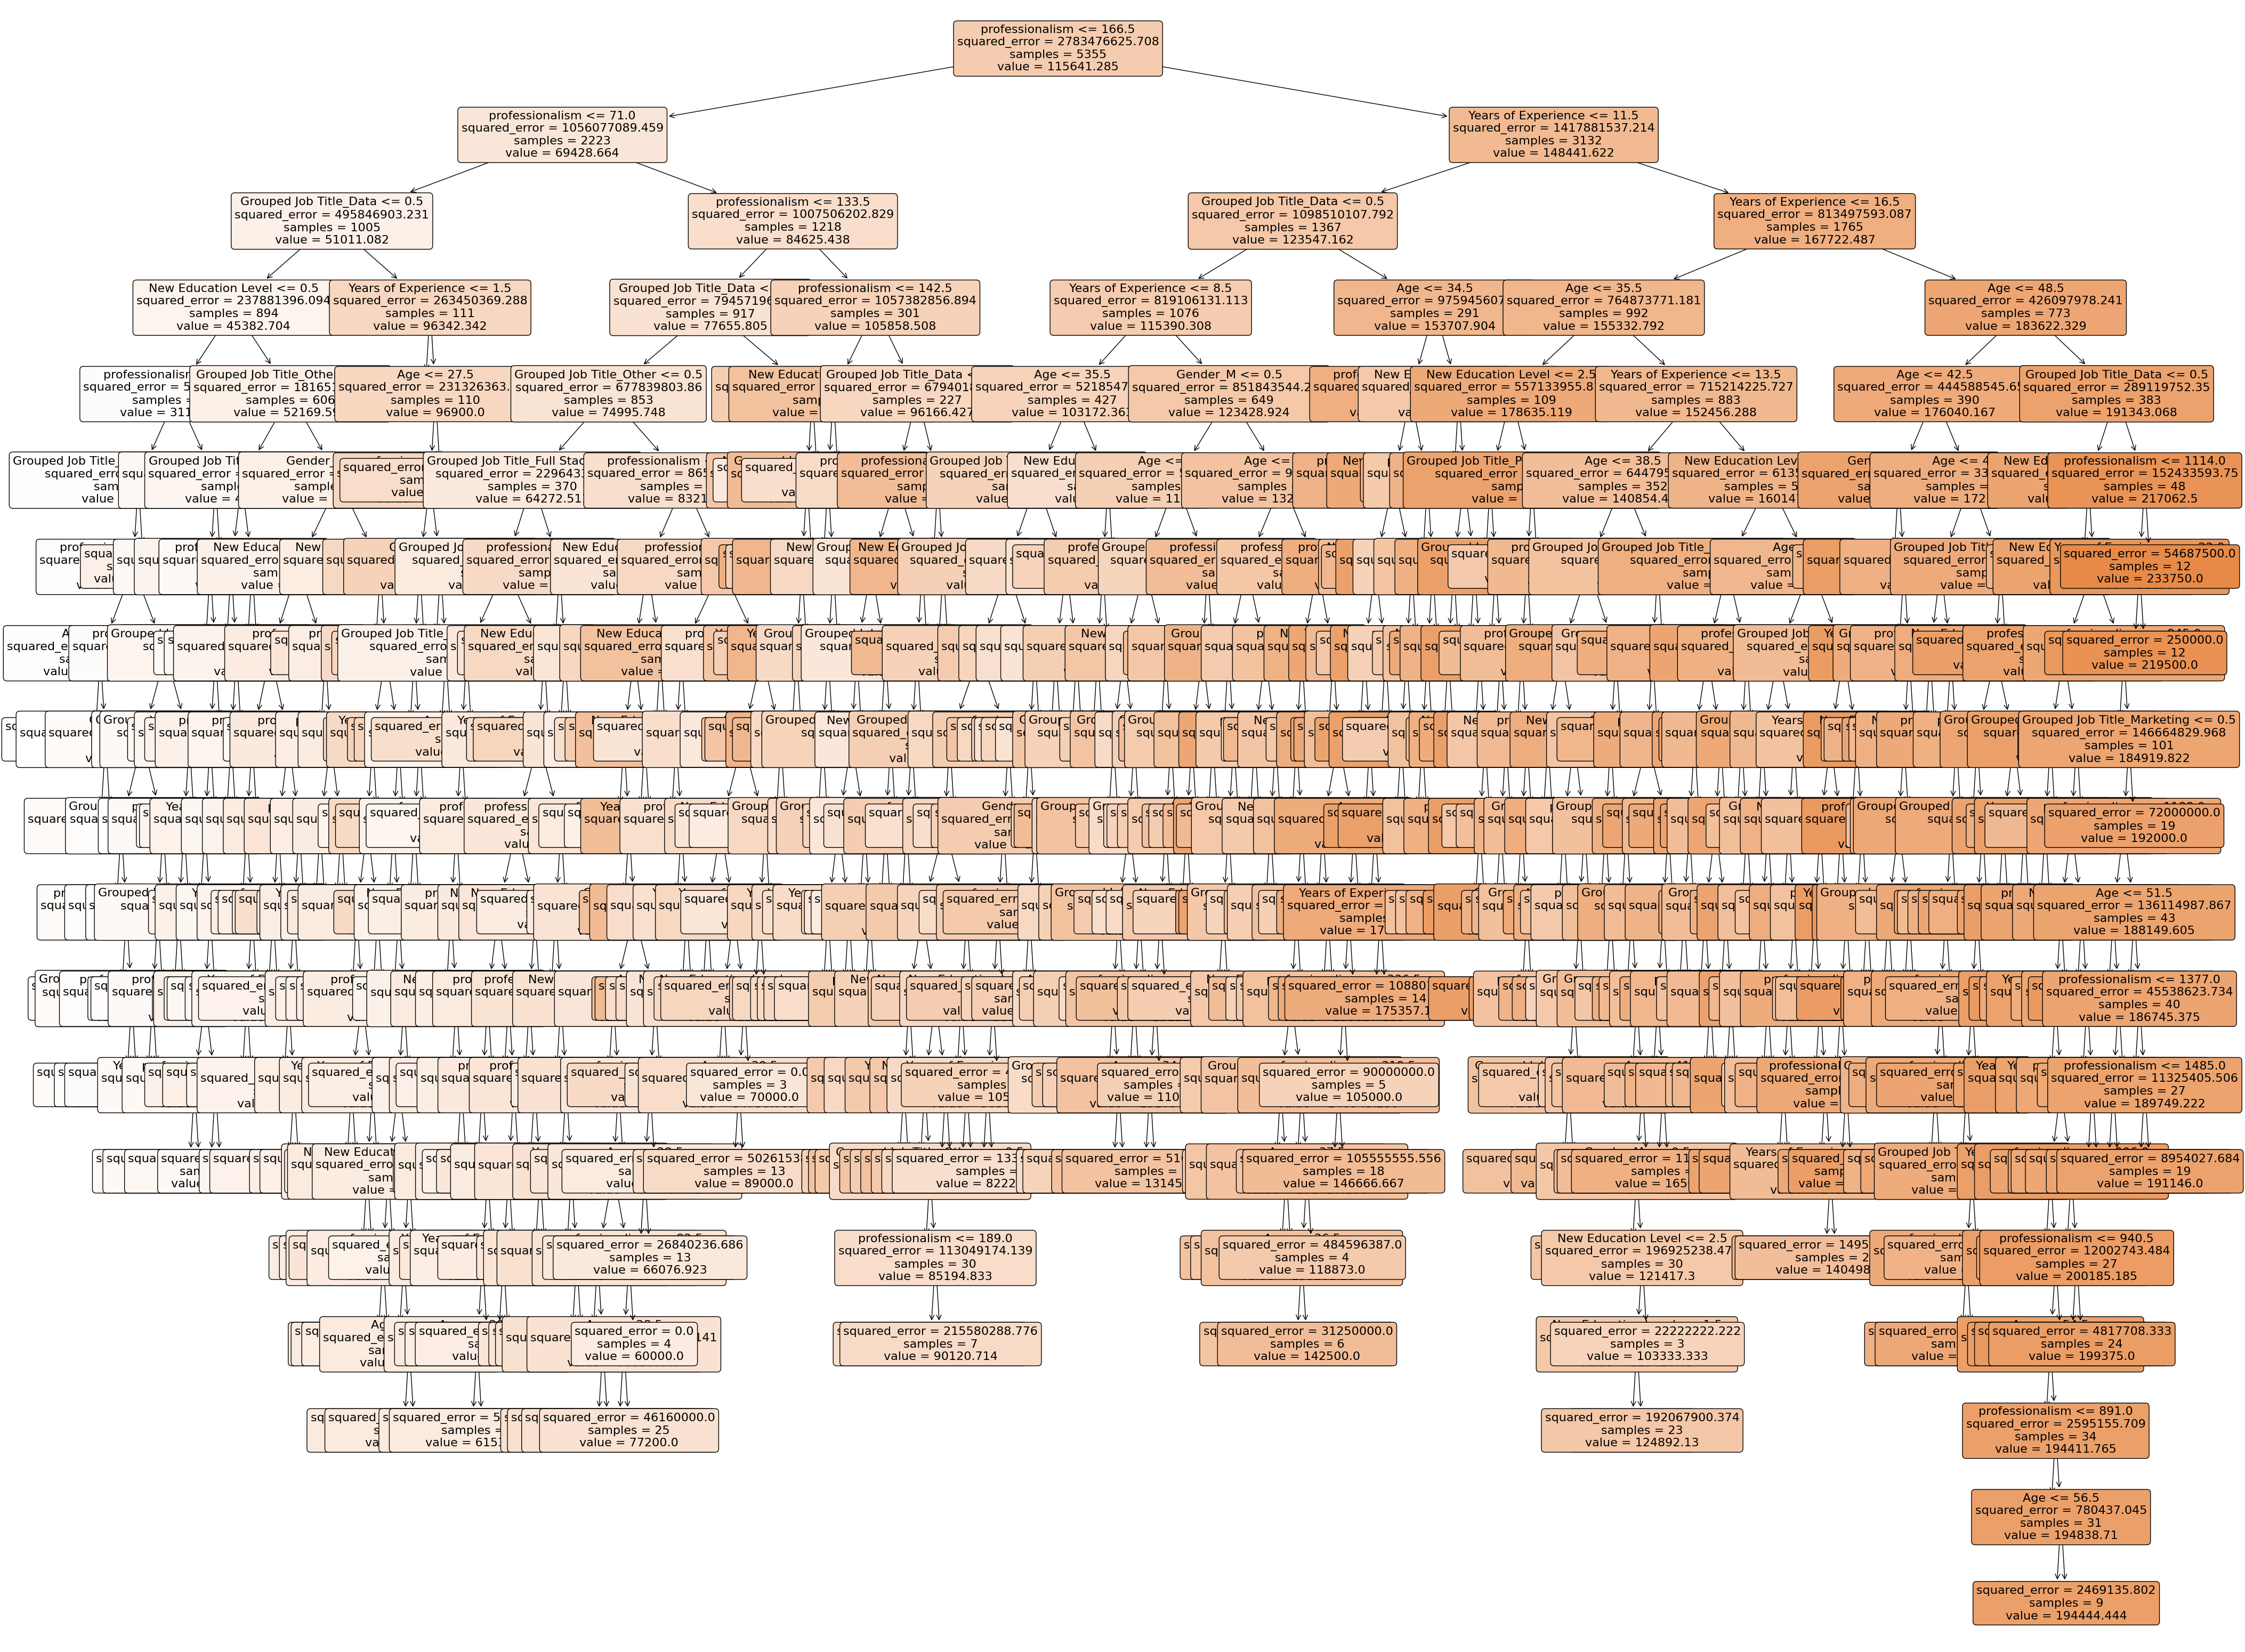

In [106]:
plt.figure(figsize=(50,40))  # Set the figure size
plot_tree(model, 
          feature_names=feature_names.tolist(),  # One-hot encoded feature names
          filled=True, 
          rounded=True, 
          fontsize=16)
plt.show()

Model Evaluation (Train Dataset)

In [107]:
# Make predictions on the training set
y_train_pred = model.predict(final_df)

# Name the y train data
y_train = combined_df['Salary']

# Calculate RMSE for the training set
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f'Root Mean Square Error on training data: {rmse_train}')



Root Mean Square Error on training data: 12019.96370568627


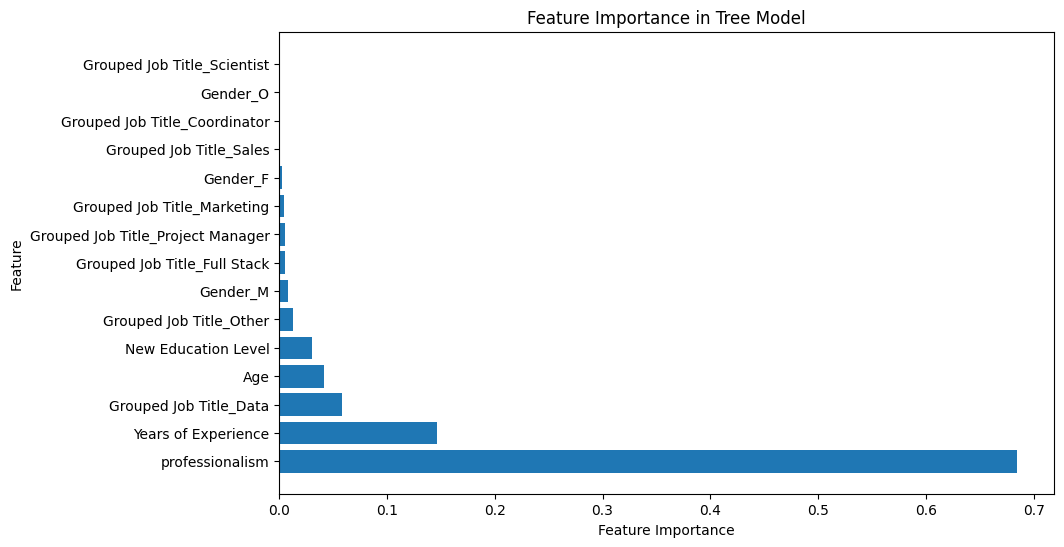

In [108]:
sorted_features = sorted(sorted_features, key=lambda x: x[1], reverse=True)
feature_names, importances = zip(*sorted_features)

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_names)), importances)
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Tree Model')
plt.show()

Study the tree model with test split

In [109]:
X_train_ts, X_test_ts, y_train_ts, y_test_ts = train_test_split(final_df, combined_df['Salary'], test_size=0.33, random_state=42)
ts_tree_model = DecisionTreeRegressor()
ts_tree_model.fit(X_train_ts, y_train_ts)

y_train_pred_ts = ts_tree_model.predict(X_train_ts)
y_test_pred_ts = ts_tree_model.predict(X_test_ts)

rmse1 = np.sqrt(mean_squared_error(y_train_ts, y_train_pred_ts))
print(f"tree_rmse_train = {rmse1}")

rmse2 = np.sqrt(mean_squared_error(y_test_ts, y_test_pred_ts))
print(f"tree_rmse_test = {rmse2}")

# tree_rmse_train = 7220.475517113695
# tree_rmse_test = 15023.530005982444

tree_rmse_train = 7220.475517113695
tree_rmse_test = 15198.160289410298


Plots of Train Test Split

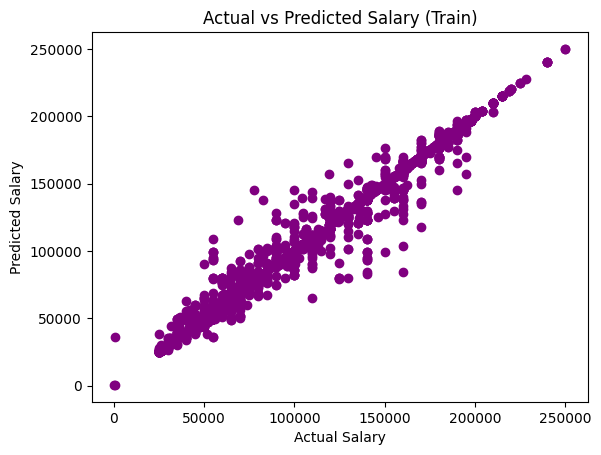

In [110]:
plt.scatter(y_train_ts, y_train_pred_ts, c='purple')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary (Train)')
plt.show()

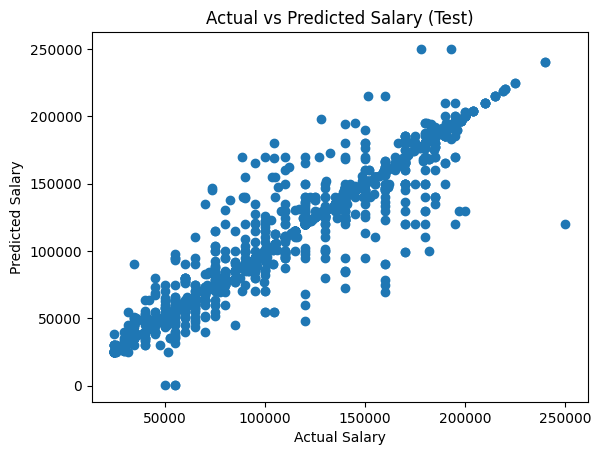

In [111]:
plt.scatter(y_test_ts, y_test_pred_ts)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary (Test)')
plt.show()

Process, Encode and Model the Test Dataset

In [112]:
X_test = pd.read_csv("X_test.csv")
print(X_test.shape)
X_test.head(2)

(1341, 13)


Unnamed: 0.1  Unnamed: 0   Age Gender  Education Level  \
0          6480        6480  47.0      M    master's|degr   
1          5343        5343  29.0      F  bachelor's|degr   

              Job Title  Years of Experience Country              Race  \
0  director|of|marketin                 16.0      us          Hispanic   
1   social|media|manage                  4.0      us  African American   

     height     weight    id  professionalism  
0  1.818297  88.182651  6480            675.0  
1  1.562833  59.760856  5343             81.0

In [113]:
# Check if 'Unnamed: 0', 'Unnamed: 0.1' and 'id' are duplicates
are_columns_duplicates_1_2 = (X_test['Unnamed: 0'] == X_test['Unnamed: 0.1']).all()
are_columns_duplicates_1_id = (X_test['Unnamed: 0'] == X_test['id']).all()
are_columns_duplicates_2_id = (X_test['Unnamed: 0.1'] == X_test['id']).all()

# Drop 'Unnamed: 0' and 'Unnamed: 0.1' if they are duplicates of 'id'
if are_columns_duplicates_1_2 and are_columns_duplicates_1_id and are_columns_duplicates_2_id:
    X_test.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

In [114]:
# X_test = X_test[X_test['Gender'] != 'O'] we can't remove them as they are included in the submission test

In [115]:
X_test.shape  # changed from (1341, 13) to (1341, 11)
X_test.info() # X test has no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1341 non-null   float64
 1   Gender               1341 non-null   object 
 2   Education Level      1341 non-null   object 
 3   Job Title            1341 non-null   object 
 4   Years of Experience  1341 non-null   float64
 5   Country              1341 non-null   object 
 6   Race                 1341 non-null   object 
 7   height               1341 non-null   float64
 8   weight               1341 non-null   float64
 9   id                   1341 non-null   int64  
 10  professionalism      1341 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 115.4+ KB


In [116]:
y_test = pd.read_csv("y_test.csv")
y_test.head(2)

Unnamed: 0    id    Salary
0           0  6480   25465.0
1           1  5343  166574.0

In [117]:
print(y_test.shape)  # (1341, 3)
print(y_test.info())  # no missing values

(1341, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1341 non-null   int64  
 1   id          1341 non-null   int64  
 2   Salary      1341 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 31.6 KB
None


In [118]:
# Combine X_test and y_test based on 'id'
combined_df_test = pd.merge(X_test, y_test, on='id', how='inner')
combined_df_test = combined_df_test.drop(['Unnamed: 0'], axis=1)
combined_df_test.head(2)

Age Gender  Education Level             Job Title  Years of Experience  \
0  47.0      M    master's|degr  director|of|marketin                 16.0   
1  29.0      F  bachelor's|degr   social|media|manage                  4.0   

  Country              Race    height     weight    id  professionalism  \
0      us          Hispanic  1.818297  88.182651  6480            675.0   
1      us  African American  1.562833  59.760856  5343             81.0   

     Salary  
0   25465.0  
1  166574.0

In [119]:
# Create a new education level column with cleaned-up labels
combined_df_test['New Education Level'] = combined_df_test['Education Level'].map(education_mapping)
combined_df_test['Grouped Job Title'] = combined_df_test['Job Title'].apply(group_job_titles)
combined_df_test.head(2)

Age Gender  Education Level             Job Title  Years of Experience  \
0  47.0      M    master's|degr  director|of|marketin                 16.0   
1  29.0      F  bachelor's|degr   social|media|manage                  4.0   

  Country              Race    height     weight    id  professionalism  \
0      us          Hispanic  1.818297  88.182651  6480            675.0   
1      us  African American  1.562833  59.760856  5343             81.0   

     Salary  New Education Level Grouped Job Title  
0   25465.0                    3             Other  
1  166574.0                    2             Other

In [120]:
# Create a boxplot 
# As expected, the 'other' group is very variable and probably needs more grouping
# plt.figure(figsize=(15, 10))
# sns.boxplot(x='Grouped Job Title', y='Salary', data=combined_df_test)
# plt.title("Boxplot of Salaries by Grouped Job Title (Test)")
# plt.xticks(rotation=45)
# plt.show()

In [121]:
# expected to be uninformative as y_test is fabricated and not real salary data

In [122]:
# Get rid of jobs that are difficult to classify
# combined_df_test = combined_df_test[combined_df_test['Grouped Job Title'] != 'Other']

In [123]:
# Keep id column separate
id_column = combined_df_test['id'].reset_index(drop=True)
id_column # pandas.core.series.Series

0       6480
1       5343
2       2576
3       6103
4       3290
        ... 
1336    3263
1337    4434
1338    4049
1339    2102
1340    2506
Name: id, Length: 1341, dtype: int64

In [124]:
combined_df_test.head(2)

Age Gender  Education Level             Job Title  Years of Experience  \
0  47.0      M    master's|degr  director|of|marketin                 16.0   
1  29.0      F  bachelor's|degr   social|media|manage                  4.0   

  Country              Race    height     weight    id  professionalism  \
0      us          Hispanic  1.818297  88.182651  6480            675.0   
1      us  African American  1.562833  59.760856  5343             81.0   

     Salary  New Education Level Grouped Job Title  
0   25465.0                    3             Other  
1  166574.0                    2             Other

In [125]:
# One-hot encode the categorical data (with the same encoder of train data and same columns)
encoded_categorical_data_test = encoder.fit_transform(combined_df_test[categorical_cols])

# Create a DataFrame from the encoded data, with correct column names
encoded_df_test = pd.DataFrame(encoded_categorical_data_test, columns=encoder.get_feature_names_out(categorical_cols))

# Combine with numerical data
final_df_test = pd.concat([encoded_df_test.reset_index(drop=True), combined_df_test[numerical_cols].reset_index(drop=True)], axis=1)

Model Evaluation (Test Dataset)

In [126]:
# Make predictions on the test set
y_test_pred = model.predict(final_df_test)

# Name the y train data
y_test = combined_df_test['Salary']

# Calculate RMSE for the training set
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Root Mean Square Error on training data: {rmse_test}')

Root Mean Square Error on training data: 72088.9658486984


Predicted vs Actual

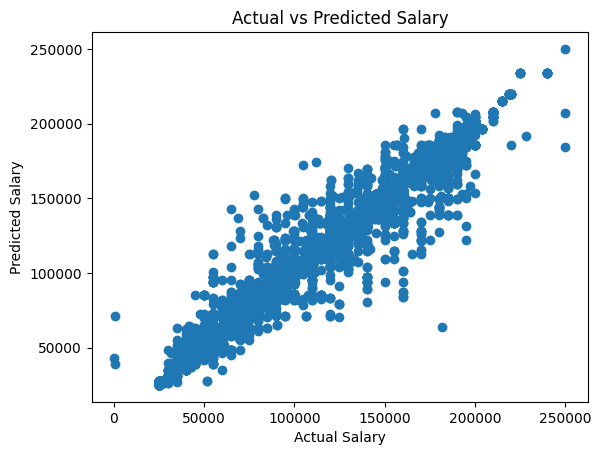

In [127]:
plt.scatter(y_train, y_train_pred)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.show()

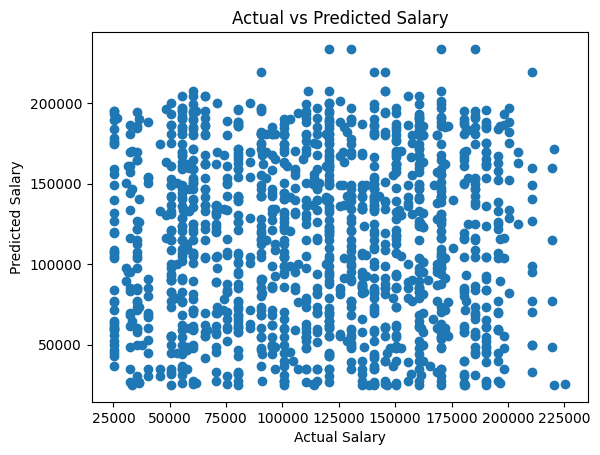

In [128]:
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.show()

The random scatter is expected as the y_test is fabricated

In [129]:
combined_df_test.head()
# print(y_test_pred)

Age Gender  Education Level             Job Title  Years of Experience  \
0  47.0      M    master's|degr  director|of|marketin                 16.0   
1  29.0      F  bachelor's|degr   social|media|manage                  4.0   
2  29.0      M        high|scho     back|end|develope                  5.0   
3  40.0      M    master's|degr     marketing|directo                 15.0   
4  29.0      M  bachelor's|degr      software|enginee                  6.0   

  Country              Race    height     weight    id  professionalism  \
0      us          Hispanic  1.818297  88.182651  6480            675.0   
1      us  African American  1.562833  59.760856  5343             81.0   
2      us  African American  2.059395  46.765234  2576            108.0   
3      us             Asian  2.482954  89.530121  6103            532.0   
4      us  African American  1.639781  42.973461  3290            112.0   

     Salary  New Education Level Grouped Job Title  
0   25465.0                    3             Other  
1  166574.0                    2             Other  
2   70862.0                    0             Other  
3   65465.0                    3         Marketing  
4  190465.0                    2             Other

Create a dictionary with the Predicted Values

In [130]:
output_dict = {}
for i, value in enumerate(y_test_pred):
    test_id = id_column[i]  # Fetch original id
    output_dict[str(test_id)] = value  # Convert the id to a string

 Convert Dictionary to JSON File

In [131]:
with open('Daria_non_final_predictions.json', 'w') as f:
    json.dump(output_dict, f)

we took Shchar's JSON

SyntaxError: unterminated string literal (detected at line 4) (3267998496.py, line 4)

In [ ]:
# 'output_dict

Resources:
1. Naya notebooks
2. Chat GPT
3. https://www.youtube.com/watch?v=1fFVt4tQjRE